<a href="https://colab.research.google.com/github/DicheDiez10/CSCI-191-T-ML/blob/main/KaggleTitanic/KaggleTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing

####Importing the libraries we will use

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

####Import the 3 data sets that are given via https://www.kaggle.com/c/titanic/data

In [2]:
#Reading the files given:
train_df             = pd.read_csv("https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleTitanic/TitanicTrain.csv")
test_df              = pd.read_csv("https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleTitanic/TitanicTest.csv")
sample_submission_df = pd.read_csv("https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleTitanic/TitanicSampleSubmission.csv")

In [3]:
#Output verification of datasets imported and read
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Note that the 'Test' set is missing the 'Survived' Column as it is the target/response variable that is in question.

In [4]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
#Shows the output form: 2 columns = PassengerId and Survived column, with test_df amount of rows.
#The shape that is desired.
sample_submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### Determine information about the data we are using

####Kaggle data dictionary



---
*Data Description found on* https://www.kaggle.com/c/titanic/data

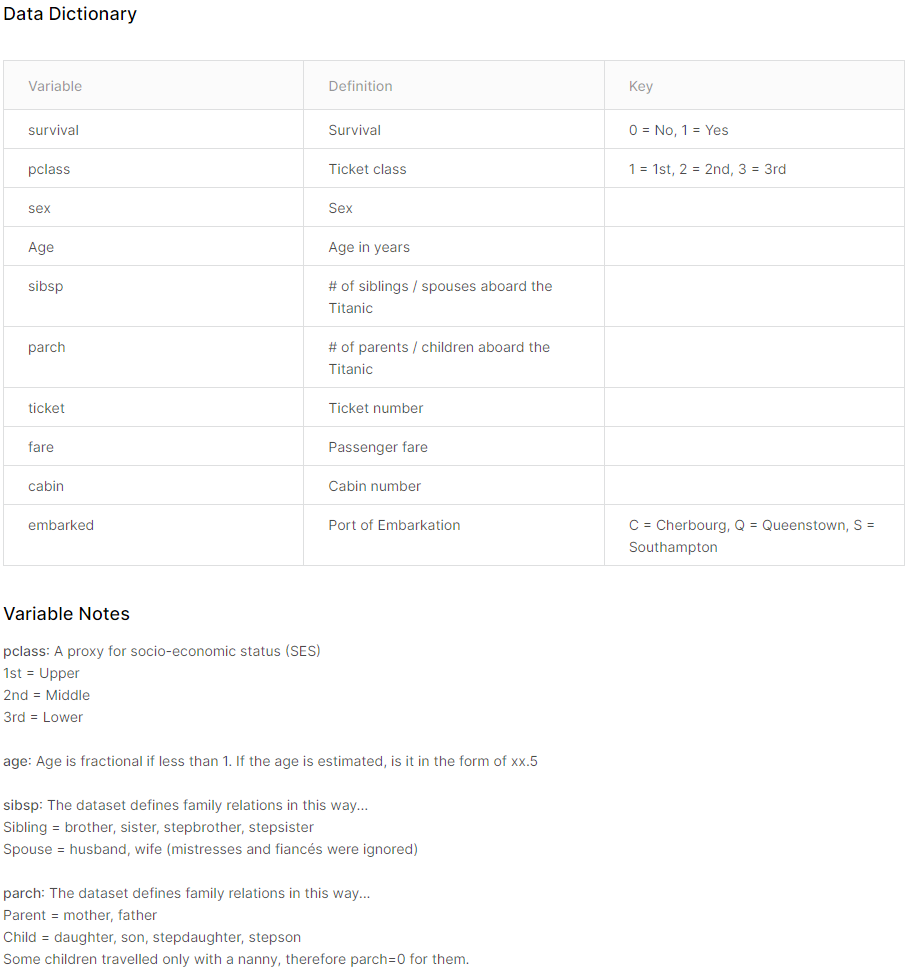

---

####Training Data Information

In [6]:
# train_df information/description:
train_df.info()

# check missing values in training data
print("\n\nMissing Values: ")
print(train_df.isnull().sum())

# describe the inforamtion
print("\n\n")
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked        

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font color='gray'>Here we can see that Age , Cabin, and Emabrked are the only columns with NULL/empty data. </font>


---



####Testing Data Information

In [7]:
# test_df information/description:
test_df.info()

# check missing values in training data
print("\n\nMissing Values: ")
print(test_df.isnull().sum())

# describe the inforamtion
print("\n\n")
test_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Missing Values: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64





,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<font color='gray'>Here we can see that Age , Cabin, and Fare are the only columns with NULL/empty data. </font>



---




###Categorical And Numerical Sets (Initial)

####Sets Created

In [8]:
#Numerical and Categorical Values Separated Accordingly
numericals_df = train_df[['Age', 'SibSp', 'Parch', 'Fare']] #PassengerId not needed #histograms
categoricals_df = train_df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']] #value counts

print("Numericals:\n" , numericals_df)
print("\nCategoricals: \n" , categoricals_df)

Numericals:
       Age  SibSp  Parch     Fare
0    22.0      1      0   7.2500
1    38.0      1      0  71.2833
2    26.0      0      0   7.9250
3    35.0      1      0  53.1000
4    35.0      0      0   8.0500
..    ...    ...    ...      ...
886  27.0      0      0  13.0000
887  19.0      0      0  30.0000
888   NaN      1      2  23.4500
889  26.0      0      0  30.0000
890  32.0      0      0   7.7500

[891 rows x 4 columns]

Categoricals: 
      Survived  Pclass     Sex            Ticket Cabin Embarked
0           0       3    male         A/5 21171   NaN        S
1           1       1  female          PC 17599   C85        C
2           1       3  female  STON/O2. 3101282   NaN        S
3           1       1  female            113803  C123        S
4           0       3    male            373450   NaN        S
..        ...     ...     ...               ...   ...      ...
886         0       2    male            211536   NaN        S
887         1       1  female            11205

#### Numerical Histograms with Density Curves

Age Distribution w/ Density Curve (Red):
Age Min:  0.42
Age Max:  80.0


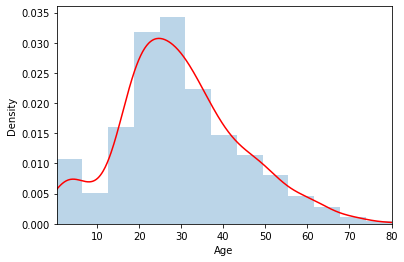

SibSp Distribution w/ Density Curve (Red):
SibSp Min:  0
SibSp Max:  8


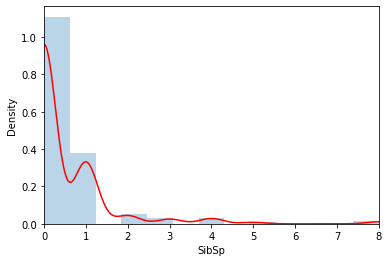

Parch Distribution w/ Density Curve (Red):
Parch Min:  0
Parch Max:  6


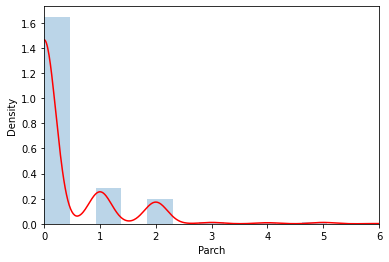

Fare Distribution w/ Density Curve (Red):
Fare Min:  0.0
Fare Max:  512.3292


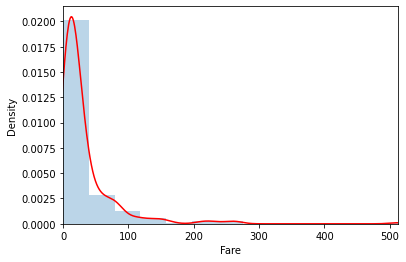

In [9]:
#Histogram showing distribution of all INITIAL '[Numerical Column Name]' with the density curve plotted against it
for col in numericals_df.columns:
  print( col, "Distribution w/ Density Curve (Red):")
  print( col, "Min: ", train_df[col].min())
  print( col, "Max: ", train_df[col].max())
  ax = train_df[col].hist(bins=13, density=True, alpha=0.3) # Histogram
  train_df[col].plot(kind='density', color='red') #Density curve
  ax.set(xlabel= col) #X-Axis label
  plt.xlim(train_df[col].min(),train_df[col].max()) # Limits of values for the X - Axis
  plt.show()    

####Categorical Bar Graphs

Survived Bar Chart:


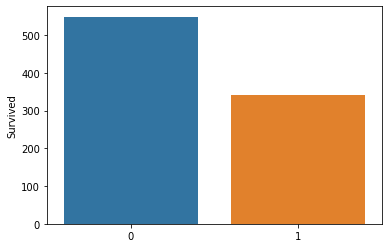

Pclass Bar Chart:


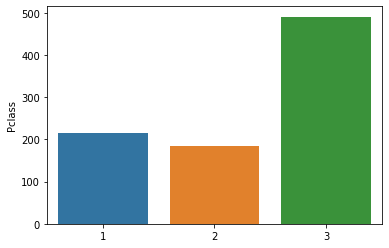

Sex Bar Chart:


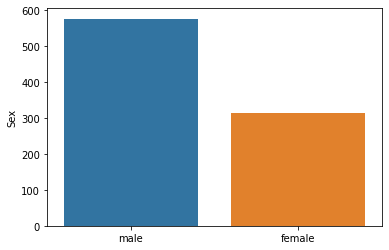

Ticket Bar Chart:


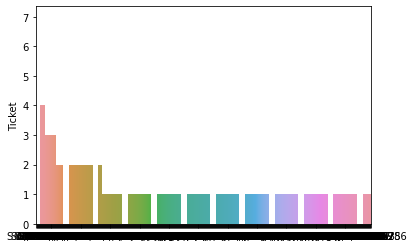

Cabin Bar Chart:


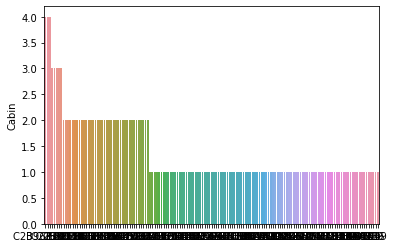

Embarked Bar Chart:


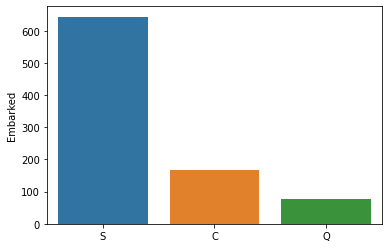

In [10]:
#Categoricals shown
for col in categoricals_df.columns:
  print( col, "Bar Chart:")
  #barplot(column name info, column name counts)
  sns.barplot(categoricals_df[col].value_counts().index , categoricals_df[col].value_counts())
  plt.show()

---

###Questions Answered (Initial)

####Probability of Survival by Sex

Probability of Survival by Sex:
       Sex  Survived
0  female  0.742038
1    male  0.188908 




Text(0.5, 1.0, 'Probability of Survival by Sex')

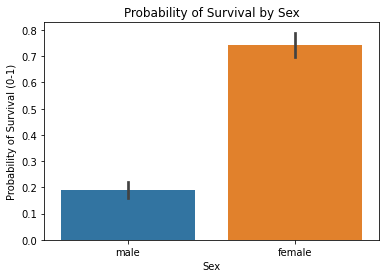

In [11]:
print("Probability of Survival by Sex:\n", train_df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean(), "\n\n")
sns.barplot(x = 'Sex' , y = 'Survived', data = train_df)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Probability of Survival by Sex")

####Probability of Survival by Class

Probability of Survival by Class:
    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 




Text(0.5, 1.0, 'Probability of Survival by Class')

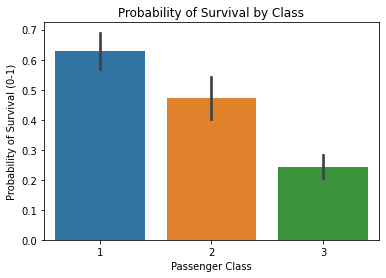

In [12]:
print("Probability of Survival by Class:\n", train_df[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean(), "\n\n")
sns.barplot(x = 'Pclass' , y = 'Survived', data = train_df)
plt.ylabel('Probability of Survival (0-1)')
plt.xlabel('Passenger Class')
plt.title("Probability of Survival by Class")

####Probability of Survival by Embarked Location

Probability of Survival by Embarked:
   Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957 




Text(0.5, 1.0, 'Probability of Survival by Embarked')

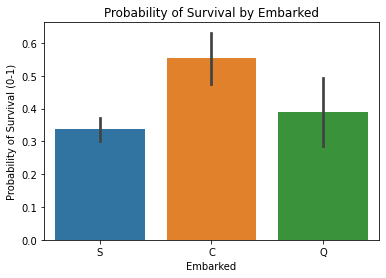

In [13]:
#Mean of survival  by categoricals
print("Probability of Survival by Embarked:\n", train_df[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean(), "\n\n")
sns.barplot(x = 'Embarked' , y = 'Survived', data = train_df)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Probability of Survival by Embarked")

---

####Did Class Affect The Survival Percentage By Sex?

Count Amount of Sex-By-Class:
Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347 


-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Sex by Class:
               Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447 



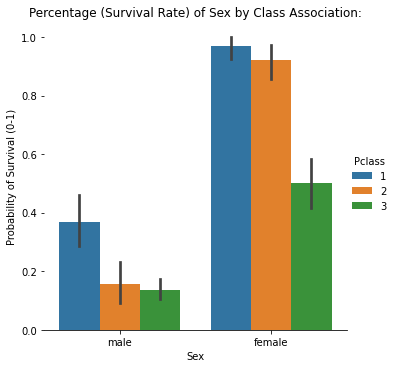

-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Sex by Class:
               Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447 



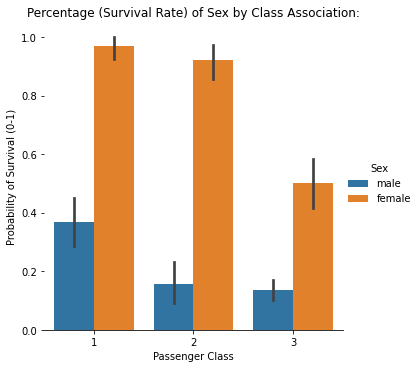

In [14]:
#Did class affect the survival percentage by sex?

#Count
print("Count Amount of Sex-By-Class:")
print(pd.pivot_table(train_df, values = "Ticket", index = "Sex", columns = "Pclass", aggfunc= "count"), "\n\n")
print("-------------------------------------------------------------")

#Same table as below with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Sex by Class:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Sex", "Pclass"])
print(table, "\n")

ClassBySex = sns.factorplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = train_df, kind = 'bar')
ClassBySex.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Percentage (Survival Rate) of Sex by Class Association:")
plt.show()


print("-------------------------------------------------------------")


#Same table as above with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Sex by Class:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Pclass", 'Sex'])
print(table, "\n")

SexByClass = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train_df, kind = 'bar')
SexByClass.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.xlabel('Passenger Class')
plt.title("Percentage (Survival Rate) of Sex by Class Association:")
plt.show()


####Did Embarked Location Affect The Survival Percentage By Sex?

Count Amount of Sex-By-Embarked:
Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441 


-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Sex by Embarked:
                 Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       Q         0.073171
       S         0.174603 



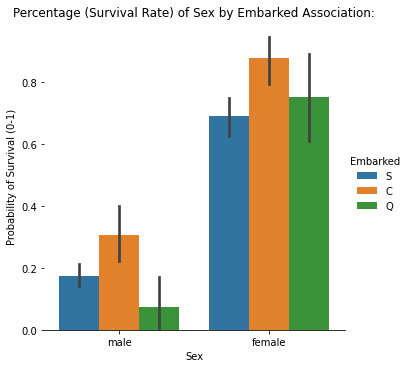

-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Sex by Embarked:
                 Survived
Embarked Sex             
C        female  0.876712
         male    0.305263
Q        female  0.750000
         male    0.073171
S        female  0.689655
         male    0.174603 



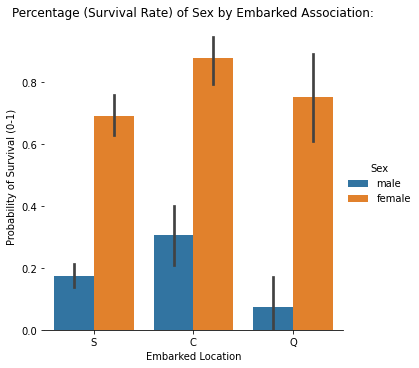

In [15]:
#Did embarking-from location affect the survival percentage by sex?

print("Count Amount of Sex-By-Embarked:")
print(pd.pivot_table(train_df, values = "Ticket", index = "Sex", columns = "Embarked", aggfunc= "count"), "\n\n")
print("-------------------------------------------------------------")


#Same table as below with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Sex by Embarked:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Sex", "Embarked"])
print(table, "\n")

ClassBySex = sns.factorplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data = train_df, kind = 'bar')
ClassBySex.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Percentage (Survival Rate) of Sex by Embarked Association:")
plt.show()


print("-------------------------------------------------------------")


#Same table as above with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Sex by Embarked:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Embarked", 'Sex'])
print(table, "\n")

SexByClass = sns.factorplot(x = 'Embarked', y = 'Survived', hue = 'Sex', data = train_df, kind = 'bar')
SexByClass.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.xlabel('Embarked Location')
plt.title("Percentage (Survival Rate) of Sex by Embarked Association:")
plt.show()


####Did Certain Embarking Locations Have Higher Survival Rated Based On The Class Associations?

Count Amount of Class-By-Embarked:
Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353 


-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Class by Embarked:
                 Survived
Pclass Embarked          
1      C         0.694118
       Q         0.500000
       S         0.582677
2      C         0.529412
       Q         0.666667
       S         0.463415
3      C         0.378788
       Q         0.375000
       S         0.189802 



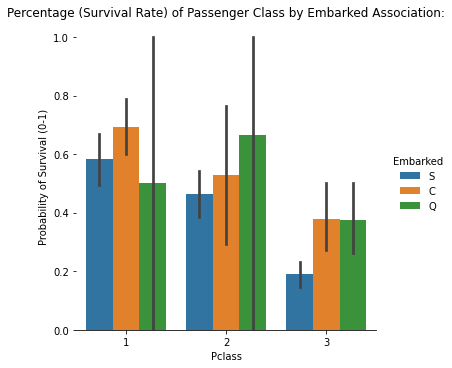

-------------------------------------------------------------



Pivot Table Representing the Percentage Survived by Class by Embarked:
                 Survived
Embarked Pclass          
C        1       0.694118
         2       0.529412
         3       0.378788
Q        1       0.500000
         2       0.666667
         3       0.375000
S        1       0.582677
         2       0.463415
         3       0.189802 



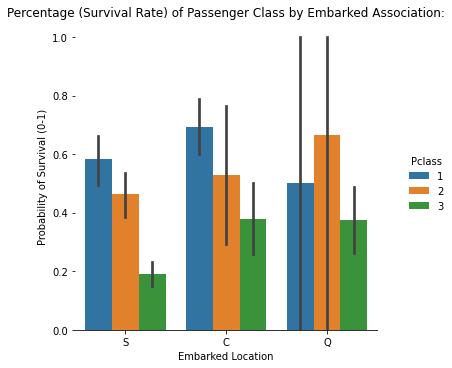

In [16]:
#Did certain Embarking locations have higher survival rates based on the class association?

print("Count Amount of Class-By-Embarked:")
print(pd.pivot_table(train_df, values = "Ticket", index = "Pclass", columns = "Embarked", aggfunc= "count"), "\n\n")
print("-------------------------------------------------------------")


#Same table as below with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Class by Embarked:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Pclass", "Embarked"])
print(table, "\n")

ClassBySex = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Embarked', data = train_df, kind = 'bar')
ClassBySex.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.title("Percentage (Survival Rate) of Passenger Class by Embarked Association:")
plt.show()


print("-------------------------------------------------------------")


#Same table as above with the X-Axis and Hue switched
print("\n\n\nPivot Table Representing the Percentage Survived by Class by Embarked:")
table = pd.pivot_table(train_df, values = "Survived", index = ["Embarked", 'Pclass'])
print(table, "\n")

SexByClass = sns.factorplot(x = 'Embarked', y = 'Survived', hue = 'Pclass', data = train_df, kind = 'bar')
SexByClass.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.xlabel('Embarked Location')
plt.title("Percentage (Survival Rate) of Passenger Class by Embarked Association:")
plt.show()



####Overall Survival Percentage by Sex by Class by Embarked Location

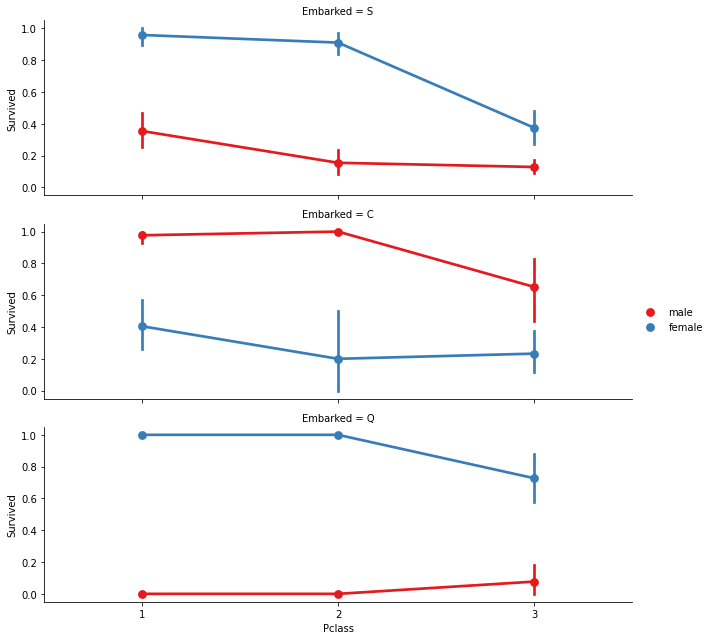

In [17]:
#Overall Survival Percentage by Sex (color) by Class (X-Axis) by Embarked (Graph#)
grid = sns.FacetGrid(train_df, row = 'Embarked', size = 3.0, aspect = 3.0)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'Set1')
grid.add_legend()

###Removing Outliers

In [18]:
#Removing Outliers function

#Found this while looking at other notebooks and felt it was very useful

def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train_df, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)
train_df.loc[outliers_to_drop, :]

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [19]:
#Drop outliers so we can analyze the numericals better

print("Before: {} rows".format(len(train_df)))

train_df = train_df.drop(outliers_to_drop, axis = 0).reset_index(drop = True)

print("After: {} rows".format(len(train_df)), "\n\n")

train_df.info()

Before: 891 rows
After: 881 rows 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB




---



---



###Numericals Visualizations

####Histograms with Curves for Age

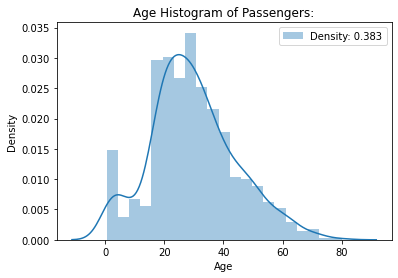

Age histograms by Deceased (0) and Survived (1):


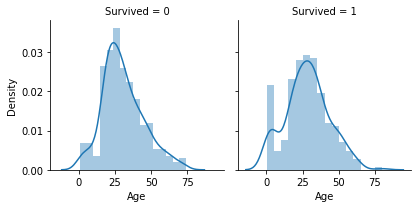

Age histograms by Passenger Class:


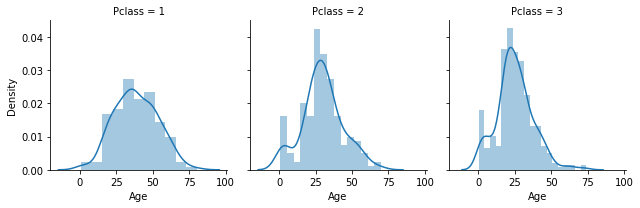

Age histograms by Embarked Location:


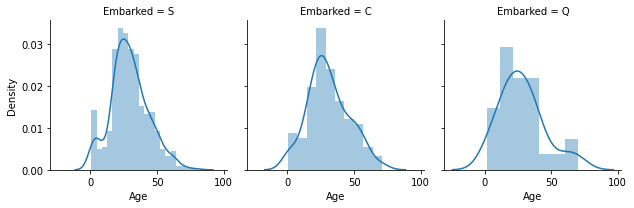




Line graph showing the density curves for ages of those who survived vs those who died


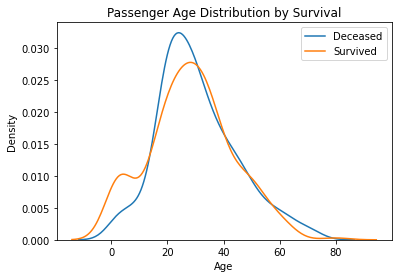

In [20]:
#Numericals : Age , SibSp , Parch , Fare
#1 Age
sns.distplot(train_df['Age'], label = 'Density: %.3f'%(train_df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Age Histogram of Passengers:')
plt.show()

#Age density by Survived/Deceased
print('Age histograms by Deceased (0) and Survived (1):')
Age_Survived_Graphs = sns.FacetGrid(train_df, col = 'Survived')
Age_Survived_Graphs.map(sns.distplot, 'Age')
plt.show()

#Age density by Passenger Class
print('Age histograms by Passenger Class:')
Age_Survived_Graphs = sns.FacetGrid(train_df, col = 'Pclass')
Age_Survived_Graphs.map(sns.distplot, 'Age')
plt.show()

#Age density by Embarked location
print('Age histograms by Embarked Location:')
Age_Survived_Graphs = sns.FacetGrid(train_df, col = 'Embarked')
Age_Survived_Graphs.map(sns.distplot, 'Age')
plt.show()

#Line graph showing the density curves for ages of those who survived vs those who died
print("\n\n")
print('Line graph showing the density curves for ages of those who survived vs those who died')
sns.kdeplot(train_df['Age'][train_df['Survived'] == 0], label = 'Deceased')
sns.kdeplot(train_df['Age'][train_df['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Passenger Age Distribution by Survival')
plt.legend()
plt.show()

####Probability of Survival by SibSp


Probability of survival by combined siblings + spouse:
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.153846
4      4  0.166667
5      5  0.000000 




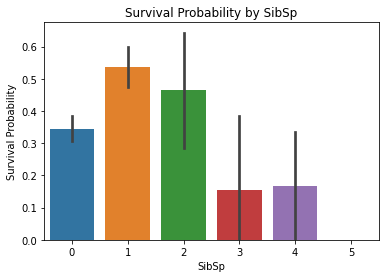

In [21]:
#SibSp
print("Probability of survival by combined siblings + spouse:")
print(train_df[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean(),"\n\n")

sns.barplot(x = 'SibSp', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')
plt.show()

####Probability of Survival by Parch

Probability of survival by combined parents + children:
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.542857
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000 




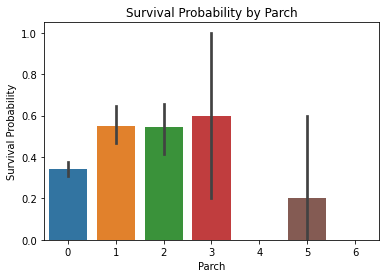

In [22]:
#Parch
print("Probability of survival by combined parents + children:")
print(train_df[['Parch', 'Survived']].groupby('Parch', as_index = False).mean(),"\n\n")

sns.barplot(x = 'Parch', y ='Survived', data = train_df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')
plt.show()

####Displaying Discrepancy in Fare

The number of null values in the 'Fare' column is:  0


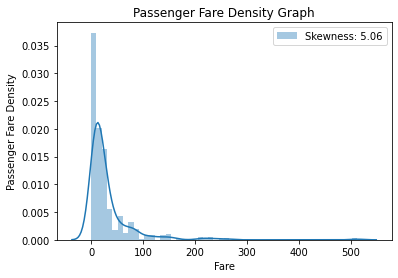

In [23]:
#Fare
#check the amount of nulls as there were nulls before
print("The number of null values in the 'Fare' column is: ", train_df['Fare'].isnull().sum())

sns.distplot(train_df['Fare'], label = 'Skewness: %.2f'%(train_df['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Density')
plt.title('Passenger Fare Density Graph')
plt.show()

###Data Preprocessing


####Original Missing Data

In [24]:
#Again printing out the values that are missing in the data
print("Missing Values: ")
print(train_df.isnull().sum())

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64


####Removing Worst Categorical Columns (See Categorical Bar Graphs)

In [25]:
#droping the two categories that provided less than stellar desires (see categorical graph counts)
training_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)
testing_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)

training_df.info()
testing_df.info()

print("\n\nMissing Values Training: ")
print(training_df.isnull().sum())
print("\n\nMissing Values Testing: ")
print(testing_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Fare         881 non-null    float64
 9   Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex      

####Removing Embarked Nulls in Training Set

In [26]:
#First we will fill in the Embarked Nulls with the mode of the rest of the data for that column so we are left with the age
#1. Determine the mode
mode_embarked = training_df['Embarked'].dropna().mode()[0]
print("Mode of the training embarked locations: ", mode_embarked, "\n")

#2. Fill in the Nulls with the 'Determined Mode'
training_df['Embarked'].fillna(mode_embarked, inplace = True)

#3. Show the output of null values remaining:
print("Missing Values Training: ")
print(training_df.isnull().sum())

Mode of the training embarked locations:  S 

Missing Values Training: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


####Removing Fare Nulls in the Testing Set

In [27]:
#Next we will fill in the Fare Nulls with the median of the rest of the data for that column so we are left with the age
#1. Determine the median
median_fare = testing_df['Fare'].dropna().median()
print("Median of the testing fare: ", median_fare, "\n")

#2. Fill in the Nulls with the 'Determined Mode'
testing_df['Fare'].fillna(median_fare, inplace = True)

#3. Show the output of null values remaining:
print("Missing Values Testing: ")
print(testing_df.isnull().sum(),"\n\n")

Median of the testing fare:  14.4542 

Missing Values Testing: 
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64 




####Combined Training and Testing

In [28]:
#Now we can combine the training and testing data because we have age as the only null column similar between the two
combine_df = pd.concat([training_df, testing_df], axis = 0).reset_index(drop = True)
combine_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


#####Combined Set Info

In [29]:
#Now see the infomation of null values in the combine_df
print("Missing Values Combined: ")
print(combine_df.isnull().sum())

#Dont worry about the Survived that are unknown because we are to determine those values (comes from test set)
#Before we can fill the age we need to figure out what corresponds to certain ages? (Sex, etc?)
#Found this next part via a notebook online that does a good job at showing how they determined how to fill
#in the age column nulls and why

Missing Values Combined: 
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            256
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


#####Creating Sex Value Column (Male:0,Female:1)

In [30]:
#Changing Sex to 0 and 1 for numerical purposes instead of categoriacal 
combine_df['Sex Value'] = combine_df['Sex'].map({'male': 0, 'female': 1})

#Display the changes
combine_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex Value
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1


#####Numericals Heat Map for Correlation

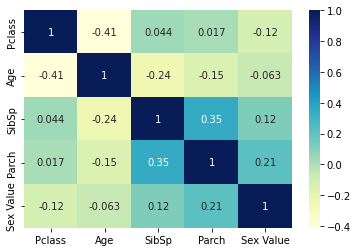

In [31]:
# Now numerical columns are: Sex Value, Pclass, Age, SibSp, and Parch
# We want to see the correlation between all numericals and then determine
# which have the strongest correlation, if any, to make a prediction about AGE

sns.heatmap(combine_df.drop(['Survived', 'Sex', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'YlGnBu')

From the heatmap from above we can see there is a negative correlation with SibSp, Parch and Pclass, and no real correlation with Sex.

#####Filling in Null Age Cells

In [32]:
#Determine the number of Null Age cells:
Null_Age_Indices = list(combine_df[combine_df['Age'].isnull()].index)
print("The number of initial null Age cells is: ", len(Null_Age_Indices))

#Determine the Null Age cells then insert an age value into them.
#The age value that will be inserted is found by locating the rows 
#that have the same SibSp, Parch and PClass values and filling the
#missing age with the median of those rows, however if the rows are
#not found, the age will be filled in with the median of the Age column.

# Loop through list and impute missing ages
for index in Null_Age_Indices:
    median_age = combine_df['Age'].median()
    predict_age = combine_df['Age'][(combine_df['SibSp'] == combine_df.iloc[index]['SibSp']) 
                                 & (combine_df['Parch'] == combine_df.iloc[index]['Parch'])
                                 & (combine_df['Pclass'] == combine_df.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine_df['Age'].iloc[index] = median_age
    else:
        combine_df['Age'].iloc[index] = predict_age

#Outputting the resulting number of null age cells
print("The number of final null Age cells is: ",combine_df['Age'].isnull().sum())

The number of initial null Age cells is:  256
The number of final null Age cells is:  0


#####Combined Final Info (Null Checking)

In [33]:
#Now see the infomation of null values in the combine_df
print("Missing Values Combined: ")
print(combine_df.isnull().sum())

#Only the Survived column is with null values because that is what we are trying to find out.

Missing Values Combined: 
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Sex Value        0
dtype: int64


###Transforming Data

####Adjusting Fare Distribution to Reduce Skewness

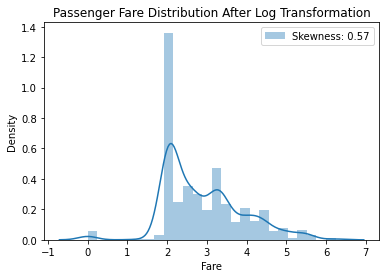

In [34]:
#Apply log transformation to Fare column to reduce skewness from before
combine_df['Fare'] = combine_df['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
sns.distplot(combine_df['Fare'], label = 'Skewness: %.2f'%(combine_df['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')
plt.show()

###Adding Features

####Title Feature 

In [35]:
#adding title to our data set
combine_df['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine_df['Name']]
#outputting titles we have
combine_df['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Dona              1
Capt              1
the Countess      1
Don               1
Sir               1
Lady              1
Jonkheer          1
Mme               1
Name: Title, dtype: int64

####Title Simplified Feature

In [36]:
# Simplifying titles
combine_df['Title Simplified'] = combine_df['Title']

combine_df['Title Simplified'] = combine_df['Title Simplified'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess','Sir', 'Dona'], 'Rare')
combine_df['Title Simplified'] = combine_df['Title Simplified'].replace(['Mlle', 'Ms'], 'Miss')
combine_df['Title Simplified'] = combine_df['Title Simplified'].replace('Mme', 'Mrs')

#outputting titles we have
combine_df['Title Simplified'].value_counts()

Mr        753
Miss      259
Mrs       198
Master     60
Rare       29
Name: Title Simplified, dtype: int64

####Probability of Survival Based on Title|Title Simplified

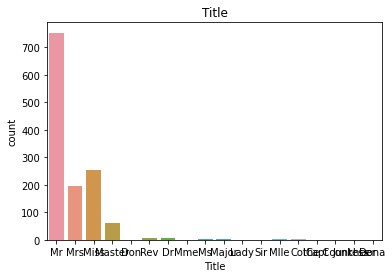

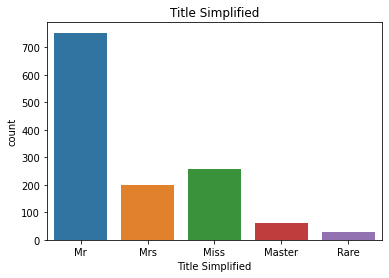

                                                 Name   Title
0                             Braund, Mr. Owen Harris      Mr
1   Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                              Heikkinen, Miss. Laina    Miss
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                            Allen, Mr. William Henry      Mr
5                                    Moran, Mr. James      Mr
6                             McCarthy, Mr. Timothy J      Mr
7                      Palsson, Master. Gosta Leonard  Master
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs
9                 Nasser, Mrs. Nicholas (Adele Achem)     Mrs
10                    Sandstrom, Miss. Marguerite Rut    Miss
11                           Bonnell, Miss. Elizabeth    Miss
12                     Saundercock, Mr. William Henry      Mr
13                        Andersson, Mr. Anders Johan      Mr
14               Vestrom, Miss. Hulda Amanda Adolfina    Miss
15      

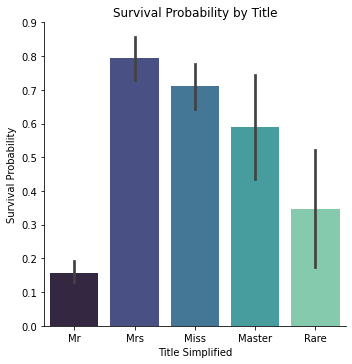

In [37]:
#showing all titles vs combined titles
sns.countplot(combine_df['Title'])
plt.title('Title')
plt.show()

sns.countplot(combine_df['Title Simplified'])
plt.title('Title Simplified')
plt.show()

print(combine_df[['Name', 'Title']].head(20), "\n\n")
print(combine_df[['Name', 'Title Simplified']].head(20), "\n\n")

#Show the survivabily now by title
sns.factorplot(x = 'Title Simplified', y = 'Survived', data = combine_df, kind = 'bar', palette = 'mako')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Title')
plt.show()

#Now we can drop the name cause
combine_df = combine_df.drop('Name', axis = 1)

####Family Size Feature

####Probability of Survival Based on Family Size

Counts of Family Size:
1     790
2     235
3     159
4      43
6      22
5      22
7      16
8       8
11      4
Name: Family Size, dtype: int64 


Survival Probability by Family Size:
   Family Size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.052632
6            7  0.333333
7            8  0.000000
8           11       NaN 




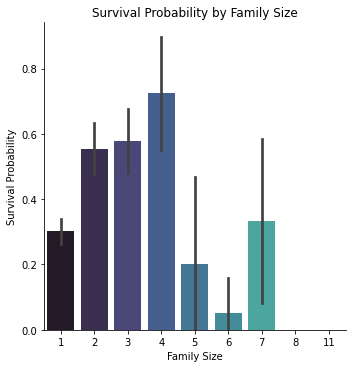

In [38]:
#Family size is the SibSp + Parch + themselves summed so lets add that

combine_df['Family Size'] = combine_df['SibSp'] + combine_df['Parch'] + 1

#now we can see the information gathered by family size
print("Counts of Family Size:")
print(combine_df['Family Size'].value_counts(), "\n\n")

#can see the survivability based on family size
print("Survival Probability by Family Size:")
print(combine_df[['Family Size', 'Survived']].groupby('Family Size', as_index = False).mean(), "\n\n")

#plotting bar graph showing probability of survival by family size
sns.factorplot(x = 'Family Size', y = 'Survived', data = combine_df, kind = 'bar', palette = 'mako')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Family Size')
plt.show()

####IsAlone Feature

####Percentage of Suvival Based on Sex by Status of Alone or Not Alone

   IsAlone  Survived
0        0  0.514535
1        1  0.303538



Pivot Table Representing the Percentage Survived by Sex by IsAlone:

                Survived
Sex    IsAlone          
female 0        0.721311
       1        0.785714
male   0        0.279503
       1        0.155718 




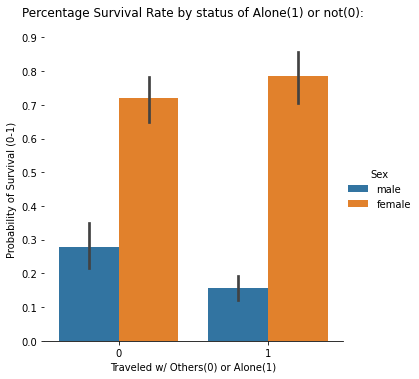

In [39]:
#by knowing family size of 1 means there was only an individual by themselves, we can create a column to track their survival rate vs those who were with others
combine_df['IsAlone'] = 0
combine_df.loc[combine_df['Family Size'] == 1, 'IsAlone'] = 1

#output the probability of them being alone vs with others
#if they are alone they are labeled as 1 and came with others is labeled as 0
print(combine_df[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean())


#pivot table showing the chart below
print("\n\n\nPivot Table Representing the Percentage Survived by Sex by IsAlone:\n")
table = pd.pivot_table(combine_df, values = "Survived", index = ['Sex', 'IsAlone'])
print(table, "\n\n")


AloneVsNotSurvival = sns.factorplot(x = 'IsAlone', y = 'Survived', hue = 'Sex', data = combine_df, kind = 'bar')
AloneVsNotSurvival.despine(left = True)
plt.ylabel('Probability of Survival (0-1)')
plt.xlabel('Traveled w/ Others(0) or Alone(1)')
plt.title("Percentage Survival Rate by status of Alone(1) or not(0):\n")
plt.show()

####Combined Datafram Info at This point

In [40]:
#dataframe information
combine_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex Value,Title,Title Simplified,Family Size,IsAlone
0,1,0.0,3,male,22.0,1,0,1.981001,S,0,Mr,Mr,2,0
1,2,1.0,1,female,38.0,1,0,4.266662,C,1,Mrs,Mrs,2,0
2,3,1.0,3,female,26.0,0,0,2.070022,S,1,Miss,Miss,1,1
3,4,1.0,1,female,35.0,1,0,3.972177,S,1,Mrs,Mrs,2,0
4,5,0.0,3,male,35.0,0,0,2.085672,S,0,Mr,Mr,1,1
5,6,0.0,3,male,25.0,0,0,2.135148,Q,0,Mr,Mr,1,1
6,7,0.0,1,male,54.0,0,0,3.948596,S,0,Mr,Mr,1,1
7,8,0.0,3,male,2.0,3,1,3.048088,S,0,Master,Master,5,0
8,9,1.0,3,female,27.0,0,2,2.409941,S,1,Mrs,Mrs,3,0
9,10,1.0,2,female,14.0,1,0,3.403555,C,1,Mrs,Mrs,2,0


####Age Group Feature & Age Group Number Feature

In [41]:
# Create age groups and compute mean of survival by age group
combine_df['Age Group'] = pd.cut(combine_df['Age'], 5)
print(combine_df[['Age Group', 'Survived']].groupby('Age Group', as_index=False).mean())

#New column
combine_df['Age Group Number']  = combine_df['Age']

#Separates into age group number
combine_df.loc[combine_df['Age'] <= 16.136, 'Age Group Number'] = 0
combine_df.loc[(combine_df['Age'] > 16.136) & (combine_df['Age'] <= 32.102), 'Age Group Number'] = 1
combine_df.loc[(combine_df['Age'] > 32.102) & (combine_df['Age'] <= 48.068), 'Age Group Number'] = 2
combine_df.loc[(combine_df['Age'] > 48.068) & (combine_df['Age'] <= 64.034), 'Age Group Number'] = 3
combine_df.loc[combine_df['Age'] > 64.034 , 'Age Group Number'] = 4
combine_df.head(20)

#drops Age group ranges
#combine_df = combine_df.drop('Age Group', axis = 1)

#output new table
#combine_df.head(10)


          Age Group  Survived
0  (0.0902, 16.136]  0.532110
1  (16.136, 32.102]  0.339662
2  (32.102, 48.068]  0.412844
3  (48.068, 64.034]  0.434783
4    (64.034, 80.0]  0.090909


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex Value,Title,Title Simplified,Family Size,IsAlone,Age Group,Age Group Number
0,1,0.0,3,male,22.0,1,0,1.981001,S,0,Mr,Mr,2,0,"(16.136, 32.102]",1.0
1,2,1.0,1,female,38.0,1,0,4.266662,C,1,Mrs,Mrs,2,0,"(32.102, 48.068]",2.0
2,3,1.0,3,female,26.0,0,0,2.070022,S,1,Miss,Miss,1,1,"(16.136, 32.102]",1.0
3,4,1.0,1,female,35.0,1,0,3.972177,S,1,Mrs,Mrs,2,0,"(32.102, 48.068]",2.0
4,5,0.0,3,male,35.0,0,0,2.085672,S,0,Mr,Mr,1,1,"(32.102, 48.068]",2.0
5,6,0.0,3,male,25.0,0,0,2.135148,Q,0,Mr,Mr,1,1,"(16.136, 32.102]",1.0
6,7,0.0,1,male,54.0,0,0,3.948596,S,0,Mr,Mr,1,1,"(48.068, 64.034]",3.0
7,8,0.0,3,male,2.0,3,1,3.048088,S,0,Master,Master,5,0,"(0.0902, 16.136]",0.0
8,9,1.0,3,female,27.0,0,2,2.409941,S,1,Mrs,Mrs,3,0,"(16.136, 32.102]",1.0
9,10,1.0,2,female,14.0,1,0,3.403555,C,1,Mrs,Mrs,2,0,"(0.0902, 16.136]",0.0


####Fare Group Feature & Fare Group Number Feature

In [42]:
#Looking at the data above, it looks like we can also create a 'Fare Group' as the fares are varying amounts and separating them into groups will allow for us to better limit the amount of distinct variables that can occur
combine_df['Fare Group'] = pd.cut(combine_df['Fare'], 4)
print(combine_df[['Fare Group', 'Survived']].groupby(['Fare Group'], as_index=False).mean())

combine_df['Fare Group Number']  = combine_df['Fare']

# Assign ordinal to each fare group
combine_df.loc[combine_df['Fare'] <= 1.56, 'Fare Group Number'] = 0
combine_df.loc[(combine_df['Fare'] > 1.56) & (combine_df['Fare'] <= 3.119), 'Fare Group Number'] = 1
combine_df.loc[(combine_df['Fare'] > 3.119) & (combine_df['Fare'] <= 4.679), 'Fare Group Number'] = 2
combine_df.loc[combine_df['Fare'] > 4.679, 'Fare Group Number'] = 3
combine_df.head(20)

         Fare Group  Survived
0  (-0.00624, 1.56]  0.062500
1     (1.56, 3.119]  0.288719
2    (3.119, 4.679]  0.517007
3    (4.679, 6.239]  0.750000


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex Value,Title,Title Simplified,Family Size,IsAlone,Age Group,Age Group Number,Fare Group,Fare Group Number
0,1,0.0,3,male,22.0,1,0,1.981001,S,0,Mr,Mr,2,0,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0
1,2,1.0,1,female,38.0,1,0,4.266662,C,1,Mrs,Mrs,2,0,"(32.102, 48.068]",2.0,"(3.119, 4.679]",2.0
2,3,1.0,3,female,26.0,0,0,2.070022,S,1,Miss,Miss,1,1,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0
3,4,1.0,1,female,35.0,1,0,3.972177,S,1,Mrs,Mrs,2,0,"(32.102, 48.068]",2.0,"(3.119, 4.679]",2.0
4,5,0.0,3,male,35.0,0,0,2.085672,S,0,Mr,Mr,1,1,"(32.102, 48.068]",2.0,"(1.56, 3.119]",1.0
5,6,0.0,3,male,25.0,0,0,2.135148,Q,0,Mr,Mr,1,1,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0
6,7,0.0,1,male,54.0,0,0,3.948596,S,0,Mr,Mr,1,1,"(48.068, 64.034]",3.0,"(3.119, 4.679]",2.0
7,8,0.0,3,male,2.0,3,1,3.048088,S,0,Master,Master,5,0,"(0.0902, 16.136]",0.0,"(1.56, 3.119]",1.0
8,9,1.0,3,female,27.0,0,2,2.409941,S,1,Mrs,Mrs,3,0,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0
9,10,1.0,2,female,14.0,1,0,3.403555,C,1,Mrs,Mrs,2,0,"(0.0902, 16.136]",0.0,"(3.119, 4.679]",2.0


###Encoding Features

####Combined Dataframe Copied (Adding Features Finished)

In [43]:
#Encoding new features
combine_with_features_df = combine_df.copy()
combine_with_features_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex Value,Title,Title Simplified,Family Size,IsAlone,Age Group,Age Group Number,Fare Group,Fare Group Number
0,1,0.0,3,male,22.0,1,0,1.981001,S,0,Mr,Mr,2,0,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0
1,2,1.0,1,female,38.0,1,0,4.266662,C,1,Mrs,Mrs,2,0,"(32.102, 48.068]",2.0,"(3.119, 4.679]",2.0
2,3,1.0,3,female,26.0,0,0,2.070022,S,1,Miss,Miss,1,1,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0
3,4,1.0,1,female,35.0,1,0,3.972177,S,1,Mrs,Mrs,2,0,"(32.102, 48.068]",2.0,"(3.119, 4.679]",2.0
4,5,0.0,3,male,35.0,0,0,2.085672,S,0,Mr,Mr,1,1,"(32.102, 48.068]",2.0,"(1.56, 3.119]",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,male,25.0,0,0,2.085672,S,0,Mr,Mr,1,1,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0
1295,1306,NaN,1,female,39.0,0,0,4.690430,C,1,Dona,Rare,1,1,"(32.102, 48.068]",2.0,"(4.679, 6.239]",3.0
1296,1307,NaN,3,male,38.5,0,0,1.981001,S,0,Mr,Mr,1,1,"(32.102, 48.068]",2.0,"(1.56, 3.119]",1.0
1297,1308,NaN,3,male,25.0,0,0,2.085672,S,0,Mr,Mr,1,1,"(16.136, 32.102]",1.0,"(1.56, 3.119]",1.0


####Drop Title, Sex Value, Age Group, Fare Group

####Add One Hot Encoding for Embarked, Title Simplified, Sex, and Pclass

In [44]:
#Encoding new features
#combine_with_features_df = combine_df.copy()

combine_with_features_df.drop(columns=['Title', 'Sex Value', 'Age Group', 'Fare Group'], axis=1, inplace=True)
combine_with_features_df = pd.get_dummies(combine_with_features_df, columns=["Embarked", "Title Simplified" , "Sex", "Pclass"])

combine_with_features_df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Family Size,IsAlone,Age Group Number,Fare Group Number,Embarked_C,Embarked_Q,Embarked_S,Title Simplified_Master,Title Simplified_Miss,Title Simplified_Mr,Title Simplified_Mrs,Title Simplified_Rare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,22.0,1,0,1.981001,2,0,1.0,1.0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,2,1.0,38.0,1,0,4.266662,2,0,2.0,2.0,1,0,0,0,0,0,1,0,1,0,1,0,0
2,3,1.0,26.0,0,0,2.070022,1,1,1.0,1.0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,4,1.0,35.0,1,0,3.972177,2,0,2.0,2.0,0,0,1,0,0,0,1,0,1,0,1,0,0
4,5,0.0,35.0,0,0,2.085672,1,1,2.0,1.0,0,0,1,0,0,1,0,0,0,1,0,0,1
5,6,0.0,25.0,0,0,2.135148,1,1,1.0,1.0,0,1,0,0,0,1,0,0,0,1,0,0,1
6,7,0.0,54.0,0,0,3.948596,1,1,3.0,2.0,0,0,1,0,0,1,0,0,0,1,1,0,0
7,8,0.0,2.0,3,1,3.048088,5,0,0.0,1.0,0,0,1,1,0,0,0,0,0,1,0,0,1
8,9,1.0,27.0,0,2,2.409941,3,0,1.0,1.0,0,0,1,0,0,0,1,0,1,0,0,0,1
9,10,1.0,14.0,1,0,3.403555,2,0,0.0,2.0,1,0,0,0,0,0,1,0,1,0,0,1,0


####Drop Age and Fare

####Change Age Group Number and Fare Group Number From Float to Int

In [45]:
#We dont really need the age and fare columns now since we separated them into age groups and fare groups for better prediciting
combine_with_features_df.drop(columns=['Age', 'Fare'], axis=1, inplace=True)

#also looking at above we should change the value of the group numbers to int instead of float
combine_with_features_df['Age Group Number'] = combine_with_features_df['Age Group Number'].astype('int')
combine_with_features_df['Fare Group Number'] = combine_with_features_df['Fare Group Number'].astype('int')

combine_with_features_df.head(10)

,PassengerId,Survived,SibSp,Parch,Family Size,IsAlone,Age Group Number,Fare Group Number,Embarked_C,Embarked_Q,Embarked_S,Title Simplified_Master,Title Simplified_Miss,Title Simplified_Mr,Title Simplified_Mrs,Title Simplified_Rare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,0,2,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1,2,1.0,1,0,2,0,2,2,1,0,0,0,0,0,1,0,1,0,1,0,0
2,3,1.0,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,4,1.0,1,0,2,0,2,2,0,0,1,0,0,0,1,0,1,0,1,0,0
4,5,0.0,0,0,1,1,2,1,0,0,1,0,0,1,0,0,0,1,0,0,1
5,6,0.0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1
6,7,0.0,0,0,1,1,3,2,0,0,1,0,0,1,0,0,0,1,1,0,0
7,8,0.0,3,1,5,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1
8,9,1.0,0,2,3,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1
9,10,1.0,1,0,2,0,0,2,1,0,0,0,0,0,1,0,1,0,0,1,0


####Split Combined Set Back Into Training and Testing Sets

In [46]:
#Now that we have all the parameters, we can separate the combined back into the train and test
training_final_df = combine_with_features_df[:len(train_df)]
testing_final_df  = combine_with_features_df[len(train_df):]

print("Initial Final Set Length: ", len(train_df))
print("Initial Final Set Length: ", len(test_df))
print("")
print("Training Final Set Length: ", len(training_final_df), " | Training Final Set Shape: ", training_final_df.shape)
print("Testing Final Set Length: ", len(testing_final_df), " | Testing Final Set Shape: ", testing_final_df.shape)


Initial Final Set Length:  881
Initial Final Set Length:  418

Training Final Set Length:  881  | Training Final Set Shape:  (881, 21)
Testing Final Set Length:  418  | Testing Final Set Shape:  (418, 21)


####Drop PassengerID from Training and Change Survived from Float to Int

In [47]:
#Training drops the passenger ID
training_final_df = training_final_df.drop('PassengerId', axis = 1)

#Training also fixes the Survived from float to int
training_final_df['Survived'] = training_final_df['Survived'].astype('int')

training_final_df.head(10)

,Survived,SibSp,Parch,Family Size,IsAlone,Age Group Number,Fare Group Number,Embarked_C,Embarked_Q,Embarked_S,Title Simplified_Master,Title Simplified_Miss,Title Simplified_Mr,Title Simplified_Mrs,Title Simplified_Rare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,2,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1,1,1,0,2,0,2,2,1,0,0,0,0,0,1,0,1,0,1,0,0
2,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,1,0,2,0,2,2,0,0,1,0,0,0,1,0,1,0,1,0,0
4,0,0,0,1,1,2,1,0,0,1,0,0,1,0,0,0,1,0,0,1
5,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1
6,0,0,0,1,1,3,2,0,0,1,0,0,1,0,0,0,1,1,0,0
7,0,3,1,5,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1
8,1,0,2,3,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1
9,1,1,0,2,0,0,2,1,0,0,0,0,0,1,0,1,0,0,1,0


####Drop Survived from Testing Set (What we are Predicting)

In [48]:
#Testing drops the Survived because we want to predict that
testing_final_df = testing_final_df.drop('Survived', axis = 1)

testing_final_df.head(10)

,PassengerId,SibSp,Parch,Family Size,IsAlone,Age Group Number,Fare Group Number,Embarked_C,Embarked_Q,Embarked_S,Title Simplified_Master,Title Simplified_Miss,Title Simplified_Mr,Title Simplified_Mrs,Title Simplified_Rare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
881,892,0,0,1,1,2,1,0,1,0,0,0,1,0,0,0,1,0,0,1
882,893,1,0,2,0,2,1,0,0,1,0,0,0,1,0,1,0,0,0,1
883,894,0,0,1,1,3,1,0,1,0,0,0,1,0,0,0,1,0,1,0
884,895,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
885,896,1,1,3,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1
886,897,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
887,898,0,0,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
888,899,1,1,3,0,1,2,0,0,1,0,0,1,0,0,0,1,0,1,0
889,900,0,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1
890,901,2,0,3,0,1,2,0,0,1,0,0,1,0,0,0,1,0,0,1


###Predicting/Modelling

####Logistic Regression Model, Fit and Predict

In [55]:
#Logistic Regression
clf1 = LogisticRegression(solver='lbfgs', max_iter=10000)
clf1.fit(training_final_df.drop('Survived', axis = 1), training_final_df['Survived'] )

LogRegPredY = clf1.predict(testing_final_df.drop('PassengerId', axis = 1).copy())
print("Logistic Regression Y Predicted: ", LogRegPredY)
print("Logistic Regression Y Predicted Accuracy: ", round(clf1.score(training_final_df.drop('Survived', axis = 1), training_final_df['Survived']) * 100, 2))

Logistic Regression Y Predicted:  [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]
Logistic Regression Y Predicted Accuracy:  82.52


####K-Nearest-Neighbors Model, Fit and Predict

In [64]:
#KNN

clf2 = KNeighborsClassifier(n_neighbors = 4)
clf2.fit(training_final_df.drop('Survived', axis = 1), training_final_df['Survived'] )

KNNPredY = clf2.predict(testing_final_df.drop('PassengerId', axis = 1).copy())
print("KNN Y Predicted: ", KNNPredY)
print("KNN Y Predicted Accuracy: ", round(clf2.score(training_final_df.drop('Survived', axis = 1), training_final_df['Survived']) * 100, 2))

KNN Y Predicted:  [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]
KNN Y Predicted Accuracy:  84.45


####Support Vector Machines (SVC) Model, Fit and Predict

In [57]:
#Support vector machine
clf3 = SVC()
clf3.fit(training_final_df.drop('Survived', axis = 1), training_final_df['Survived'])

SVCPredY = clf3.predict(testing_final_df.drop('PassengerId', axis = 1).copy())
print("SVC Y Predicted: ", SVCPredY)
print("SVC Y Predicted Accuracy: ", round(clf3.score(training_final_df.drop('Survived', axis = 1), training_final_df['Survived']) * 100, 2))

SVC Y Predicted:  [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]
SVC Y Predicted Accuracy:  83.31


####Perceptron Model, Fit and Predict

In [58]:
#Perceptron
clf4 = Perceptron()
clf4.fit(training_final_df.drop('Survived', axis = 1), training_final_df['Survived'])

PerceptronPredY = clf4.predict(testing_final_df.drop('PassengerId', axis = 1).copy())
print("Perceptron Y Predicted: ", PerceptronPredY)
print("Perceptron Y Predicted Accuracy: ", round(clf4.score(training_final_df.drop('Survived', axis = 1), training_final_df['Survived']) * 100, 2))

Perceptron Y Predicted:  [0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0
 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 1 0 0 1]
Perceptron Y Predicted Accuracy:  78.09


###Sending To CSV Our Predictions

In [66]:
TestFinalWithSurvivedPredicted1 = testing_final_df.copy()
TestFinalWithSurvivedPredicted2 = testing_final_df.copy()
TestFinalWithSurvivedPredicted3 = testing_final_df.copy()
TestFinalWithSurvivedPredicted4 = testing_final_df.copy()

TestFinalWithSurvivedPredicted1['Survived']= LogRegPredY
TestFinalWithSurvivedPredicted2['Survived']= KNNPredY
TestFinalWithSurvivedPredicted3['Survived']= SVCPredY
TestFinalWithSurvivedPredicted4['Survived']= PerceptronPredY

TestFinalWithSurvivedPredicted1[['PassengerId','Survived']].to_csv('TitanicTest_1.csv', index=False, header=True)
TestFinalWithSurvivedPredicted2[['PassengerId','Survived']].to_csv('TitanicTest_2.csv', index=False, header=True)
TestFinalWithSurvivedPredicted3[['PassengerId','Survived']].to_csv('TitanicTest_3.csv', index=False, header=True)
TestFinalWithSurvivedPredicted4[['PassengerId','Survived']].to_csv('TitanicTest_4.csv', index=False, header=True)

### Results

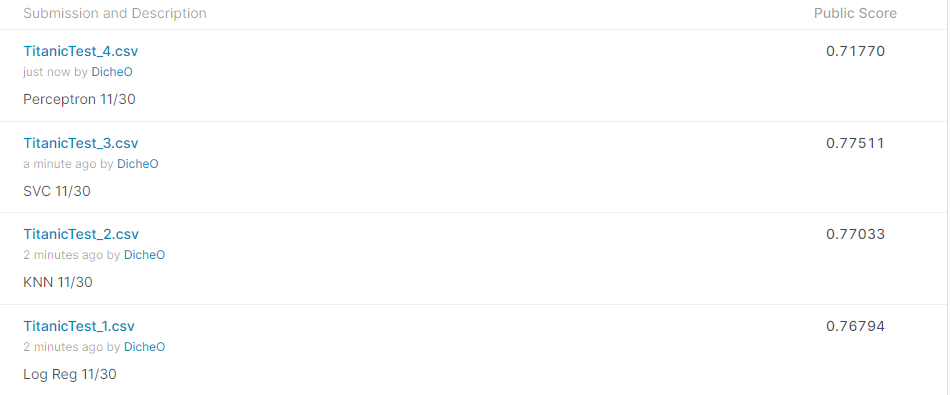